# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [4]:
#seu código aqui
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

Parece que todos estão com os tipos corretos, talvez as com yes e no seriam melhores como bool...

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [6]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [7]:
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [10]:
(df.isnull().sum()/len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [11]:
#seu código aqui
# Tanto gênero quanto churn tem valores abaixo de 1% de nulo, podemos apagar sem afetar muito a base.
df.dropna(subset=['Genero'], inplace=True)
df.dropna(subset=['Churn'], inplace=True)

In [16]:
df['Genero'].isnull().sum()
df['Churn'].isnull().sum()

np.int64(0)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

### Pagamento Mensal

In [17]:
#seu código aqui
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

In [18]:
df['Pagamento_Mensal'].median()


np.float64(71.45)

In [19]:
df['Pagamento_Mensal'].mode()


0    20.05
Name: Pagamento_Mensal, dtype: float64

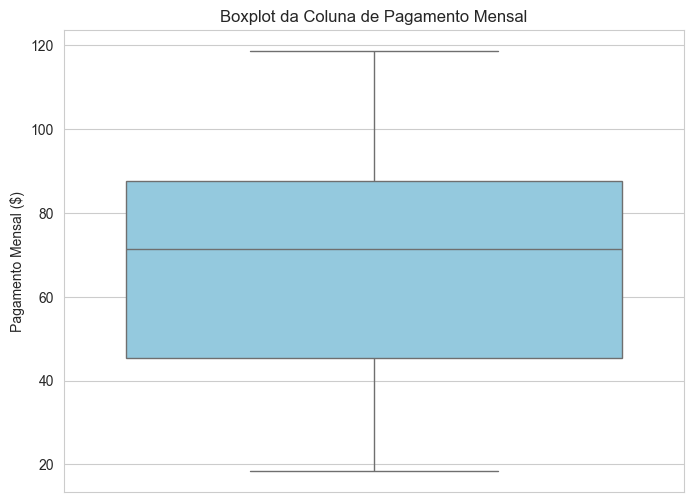

In [67]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento Mensal')
plt.ylabel('Pagamento Mensal ($)')
plt.show()

Sem outliers

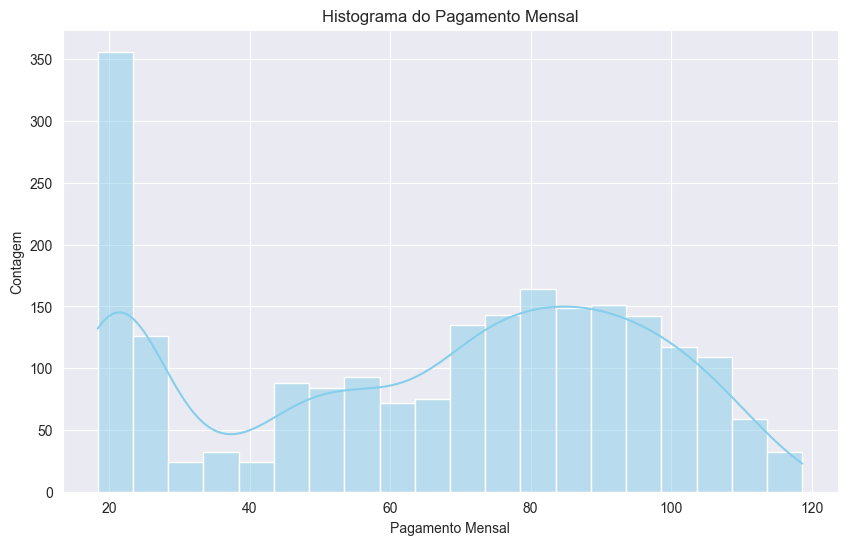

In [22]:
sns.set_style('darkgrid')

# Plotando um histograma dos salários para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma do Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Contagem')
plt.show()

Como apareceu na moda, 20 é um valor que aparece bastante

In [23]:
fill_por_mediana = df['Pagamento_Mensal'].median()
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(fill_por_mediana)

In [24]:
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

Apesar de a moda parecer ok, pois já está com muitos valores, adicionar 325 registros a ela seria péssimo, iria aumentar uma discrepância já existente, pioraria o gráfico assimétrico. Pela mediana acaba sendo melhor para mantermos a base coerente.

### Phone Service

<Axes: xlabel='PhoneService', ylabel='Count'>

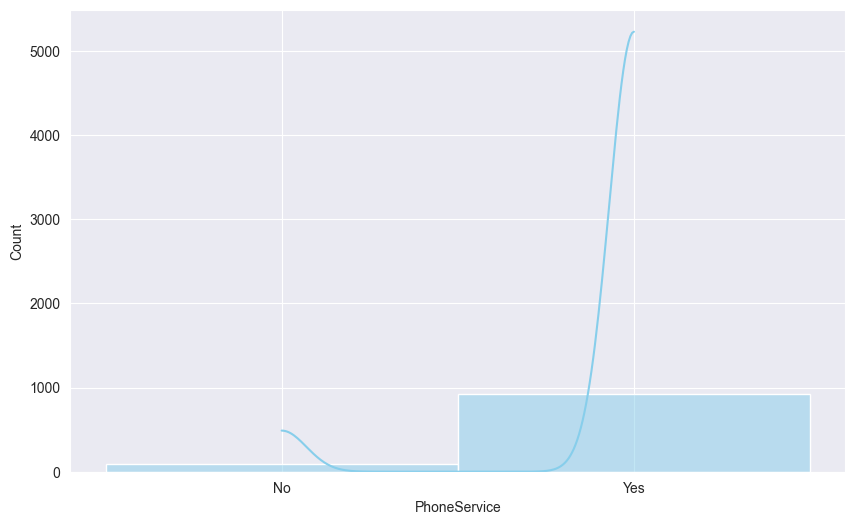

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PhoneService', bins=20, kde=True, color='skyblue')

In [28]:
df['PhoneService'].value_counts(normalize=True) * 100

PhoneService
Yes    91.451292
No      8.548708
Name: proportion, dtype: float64

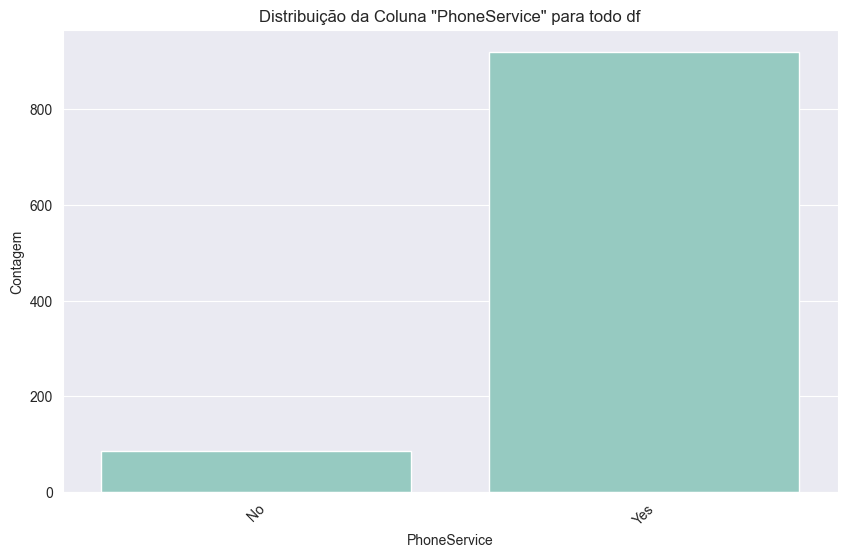

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PhoneService')
plt.title('Distribuição da Coluna "PhoneService" para todo df')
plt.xlabel('PhoneService')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

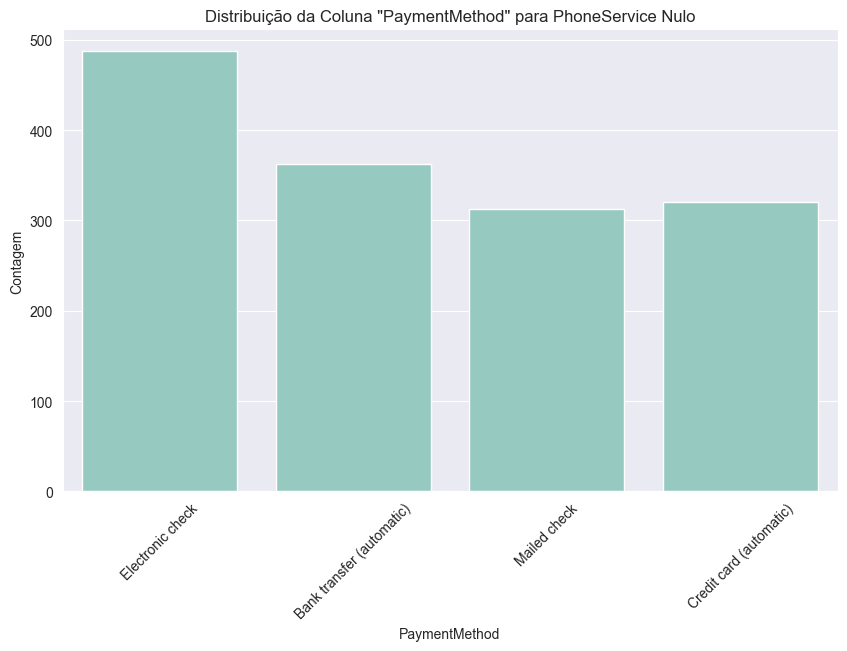

In [39]:
# Seleciona todas as linhas onde a coluna 'PhoneService' é nula
df_phoneservice_nulo = df[df['PhoneService'].isnull()]

# Plotando a distribuição dos paises
plt.figure(figsize=(10, 6))
sns.countplot(data=df_phoneservice_nulo, x='PaymentMethod')
plt.title('Distribuição da Coluna "PaymentMethod" para PhoneService Nulo')
plt.xlabel('PaymentMethod')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Não consegui achar algo satisfatório para trocar o NaN, no gráfico acima testei todos os campos, mas não encontrei uma relação direta que satisfaça com certeza os quase 1500 campos nulos. Vou manter como desconhecido

In [40]:
df["PhoneService"] = df["PhoneService"].fillna("Desconhecido")


In [41]:
df["PhoneService"].value_counts(dropna=False)


PhoneService
Desconhecido    1482
Yes              920
No                86
Name: count, dtype: int64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

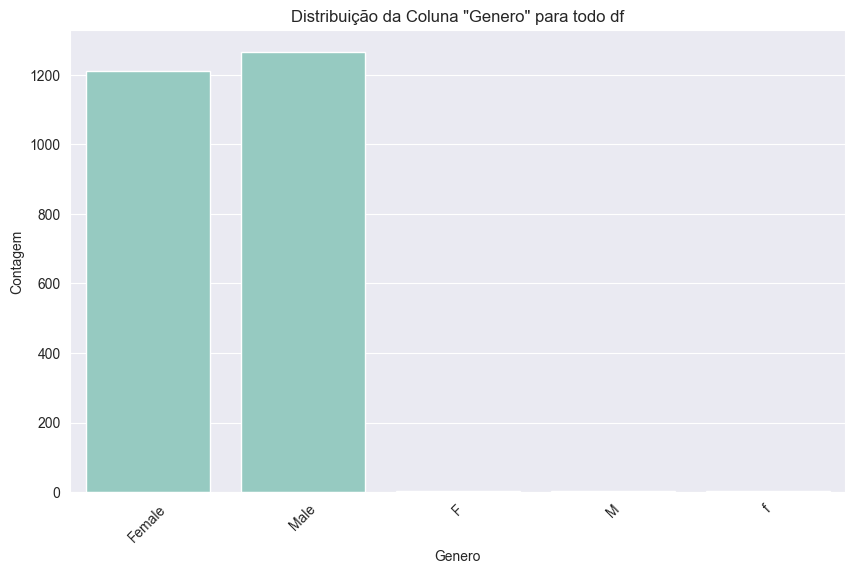

In [42]:
#seu código aqui
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genero')
plt.title('Distribuição da Coluna "Genero" para todo df')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [43]:
df['Genero'].value_counts(normalize=True) * 100

Genero
Male      50.844051
Female    48.713826
M          0.160772
f          0.160772
F          0.120579
Name: proportion, dtype: float64

In [44]:
df['Genero'] = df['Genero'].replace('F', 'Female')
df['Genero'] = df['Genero'].replace('f', 'Female')
df['Genero'] = df['Genero'].replace('M', 'Male')

In [45]:
df['Genero'].value_counts(normalize=True) * 100

Genero
Male      51.004823
Female    48.995177
Name: proportion, dtype: float64

In [51]:
df['Servico_Internet'].value_counts(normalize=True) * 100


Servico_Internet
Fiber optic    44.975884
DSL            33.561093
No             21.181672
dsl             0.281350
Name: proportion, dtype: float64

In [52]:
df['Servico_Internet'] = df['Servico_Internet'].replace('dsl', 'DSL')

In [53]:
df['Servico_Internet'].value_counts(normalize=True) * 100


Servico_Internet
Fiber optic    44.975884
DSL            33.842444
No             21.181672
Name: proportion, dtype: float64

In [64]:
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)
df.rename(columns={'PhoneService': 'Servico_Telefonico'}, inplace=True)
df.rename(columns={'PaymentMethod': 'Forma_Pagamento'}, inplace=True)
df.rename(columns={'StreamingTV': 'Servico_StreamingTV'}, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           2488 non-null   object 
 1   Genero               2488 non-null   object 
 2   Idoso                2488 non-null   int64  
 3   Casado               2488 non-null   object 
 4   Dependentes          2488 non-null   object 
 5   Tempo_como_Cliente   2488 non-null   int64  
 6   Servico_Telefonico   2488 non-null   object 
 7   Servico_Internet     2488 non-null   object 
 8   Servico_Seguranca    2488 non-null   object 
 9   Suporte_Tecnico      2488 non-null   object 
 10  Servico_StreamingTV  2488 non-null   object 
 11  Tipo_Contrato        2488 non-null   object 
 12  Forma_Pagamento      2488 non-null   object 
 13  Pagamento_Mensal     2488 non-null   float64
 14  Total_Pago           2488 non-null   float64
 15  Churn                2488 non-null   object

In [66]:
df.isnull().sum()

customerID             0
Genero                 0
Idoso                  0
Casado                 0
Dependentes            0
Tempo_como_Cliente     0
Servico_Telefonico     0
Servico_Internet       0
Servico_Seguranca      0
Suporte_Tecnico        0
Servico_StreamingTV    0
Tipo_Contrato          0
Forma_Pagamento        0
Pagamento_Mensal       0
Total_Pago             0
Churn                  0
dtype: int64

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

Fiz logo acima